# Load the dataset

In [1]:
import pandas as pd

df = pd.read_csv("data/pima-indians-diabetes.csv")

# Split the dataset into features (x) and labels (y)

In [2]:
dataset = df.values

X = dataset[:,0:8]
y = dataset[:,8]

# Split the dataset into training and testing sets

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (614, 8)
y_train shape: (614,)
X_test shape: (154, 8)
y_test shape: (154,)


# Standardize the features

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the neural network model

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(keras.Input(shape=(X_train.shape[1],)))
model.add(Dense(units=16, activation='relu', kernel_regularizer='l1'))
model.add(Dropout(0.1))
model.add(Dense(units=16, activation='relu', kernel_regularizer='l1'))
model.add(Dense(units=8, activation='relu', kernel_regularizer='l1'))
model.add(Dense(units=1, activation='sigmoid'))

# Specify the optimizer
optimizer = Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping

In [6]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

# Fit the model

In [7]:
history = model.fit(X_train, y_train, epochs=1000, batch_size=16, validation_split=0.1, callbacks=[early_stopping]).history

Epoch 1/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4302 - loss: 1.8940 - val_accuracy: 0.5968 - val_loss: 1.7674
Epoch 2/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5874 - loss: 1.7501 - val_accuracy: 0.5968 - val_loss: 1.6451
Epoch 3/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7029 - loss: 1.6093 - val_accuracy: 0.6452 - val_loss: 1.5299
Epoch 4/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6954 - loss: 1.4942 - val_accuracy: 0.6613 - val_loss: 1.4218
Epoch 5/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6977 - loss: 1.3888 - val_accuracy: 0.6774 - val_loss: 1.3219
Epoch 6/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6707 - loss: 1.2900 - val_accuracy: 0.6935 - val_loss: 1.2246
Epoch 7/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7036 - loss: 1.1746 - val_accuracy: 0.6774 - val_loss: 1.1353
Epoch 8/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6931 - loss: 1.0938 - val_accuracy: 0.

# Evaluate the model

In [8]:
loss, accuracy = model.evaluate(X_test, y_test)

print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7294 - loss: 0.5909 
Test loss: 0.5929
Test accuracy: 0.7532


# Plot the training & validation loss

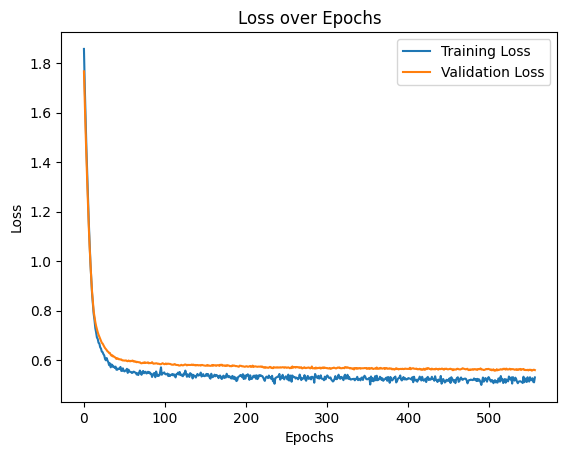

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training & validation accuracy

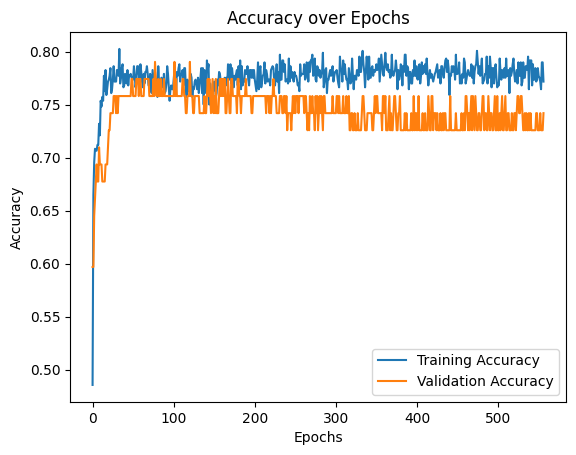

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history['accuracy'], label='Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()